# Introduction to MLPs: From Linear Regression to Neural Networks

This notebook demonstrates the evolution from simple linear regression to neural networks
using house price prediction as our running example. We'll see how increasing model
complexity allows us to capture more nuanced patterns in our data.

Key Learning Objectives:
1. Understand how linear regression works with single and multiple features
2. See why neural networks can outperform linear models
3. Compare different neural network architectures
4. Learn about model evaluation and visualization techniques

The progression in this notebook mirrors the historical development of these
techniques - we start simple and gradually add complexity, just as the field
of machine learning has evolved over time.

## Step 1: Load the necessary libraries


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Step 1-B: Fix a random seed for reproducibility

When we do things like split some percentage of the data to be used for training and some to be used for testing, we pick which elements go into each set randomly. This is great if we're running a bunch of trials to make sure that things work, but not-so-great when we're trying to get things running.

As such, we typically fix the seed so we get the same "random" output everytime. Using "42" is an homage to Hitchhiker's Guide to the Galaxy that is somewhat prevalent and pops up in random places.

In [14]:
np.random.seed(42)

## Step 2: Generate synthetic data for the simplest case
We'll create synthetic data that mimics real-world house prices. Starting with synthetic data (rather than real data) has several advantages:
1. We know the true underlying relationships
2. We can control the complexity and noise levels
3. We can generate as much data as we need
4. We can easily verify if our models are learning the patterns we created

In real estate, square footage is often one of the strongest predictors of price, which is why we start with it as our single feature. Our model is hopelessly simple and just assumes that 1 square foot costs &#36;100. i.e.:

* A 1,000 sqft house costs &#36;100,000
* A 5,000 sqft house costs &#36;500,000

We're going in reverse here, by:
1. Starting with a function
2. Using it to create 1,000 data points
3. Making the data seem "more realistic" by adding noise to it

But I want to emphasize a fundamental assumption in machine learning:

**There is an underlying mathematical model (i.e. function) that best represents the data**

The "best" is important since nothing might match it super well, but something will be as good as we can do.

In [15]:
def generate_house_data(n_samples=1000):
    """
    Creates synthetic house price data with a single feature.

    The relationship between square footage and price is roughly linear
    but includes realistic noise. The base price of $100 per square foot
    is chosen to approximate real market values, though this varies greatly
    by location in real life.

    Parameters:
        n_samples: Number of houses to generate

    Returns:
        sqft: Array of house square footages
        price: Array of house prices
    """
    # Generate square footage between 1000 and 5000 sq ft
    # This range covers most single-family homes in the US
    sqft = np.random.uniform(1000, 5000, n_samples)

    # Generate prices with a base rate of $100 per sq ft
    # The noise term (standard deviation of $20,000) represents factors
    # like location, condition, and market variations
    base_price = sqft * 100
    noise = np.random.normal(0, 20000, n_samples)
    price = base_price + noise

    return sqft.reshape(-1, 1), price

Now that we have a function that can create synthetic data, the next thing to do is probably just to take a look at it and make sure it's acting like we'd expect.

**Note:** "X" and "Y" in all of these examples are going to be analagous to "data" (the matrices themselves) and "labels" (the size of the diagonal block(s)) in the project that we're working on.

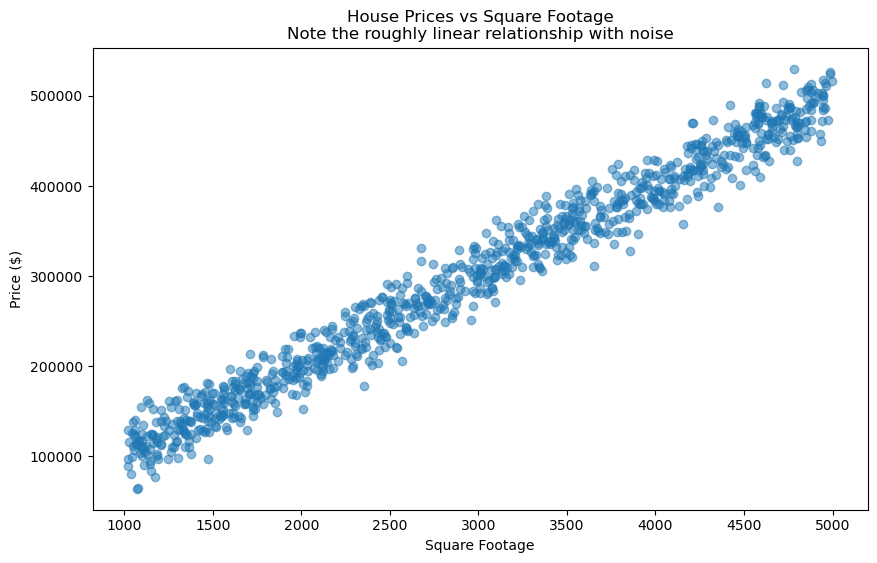

In [16]:
X_simple, y_simple = generate_house_data()

# Visualizing our single-feature dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.5)
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('House Prices vs Square Footage\nNote the roughly linear relationship with noise')
plt.show()

So now we have data. All of machine learning is about trying to guess a "model" (i.e., some sort of mathematical function) that "best describes" the data. What we're after is a way to make predictions given the data we expect as an input. Here, we receive "square footage" and we want to predict the price of the house. 

Given just a single square footage amount and asked to predict the purchase price, we'd probably... fail miserably. Given the set of data points above (that combine square footage and purchase price), we could make a good guess. 

The easiest way to make a prediction is to get some function that runs through the data and just use that to make a prediction.

The first model we're going to play with is just linear regression (i.e., drawing a line through the data). Linear regression is one of the oldest and simplest machine learning algorithms. It tries to fit a straight line through the data by minimizing the squared differences between predicted and actual values. What this means is that we're going to test a bunch of different lines

![Linear Regression Picture](<squared-error-viz.png>)

Note that for the example picture here, there's an "optimal line" (no proof given, but it looks pretty good) in red, and a sub-optimal line in dashed purple. We're judging optimality here in minimizing the (squared) error between the line and the data points. With more data, this calculation becomes more cumbersome but it's the same idea. 

Conceptually, you can imagine that we're trying every possible line through all of the data points and returning the line with the minimum error. "Error" probably meaning to square the distance between the hypothetical line and each data point and then add them together, but this will be something we can set.

Advantages of linear regression:
- Simple to understand and implement
- Fast to train
- Highly interpretable (the slope tells us price per square foot)

Limitations:
- Can only capture linear relationships
- Cannot handle interaction effects between features

## Step 3: Train the model

To have this mirror where we're going with neural networks, we're going to split the data into training and testing sets. We use 80% for training and hold out 20% for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

Now we're going to "train" the linear regression model. Train in this context (and almost all machine learning contexts) means that we used the data points we seperated into the training set to find the perfect model according to whatever we've defined "model" to mean.

Here, a model is just a simple line.

In [18]:
# Define the model to be "LinearRegression"
# This replaces all of the build_model function
lr_model = LinearRegression()

# Fitting the model is the act of trying out every possible line and returning (inside of the "lr_model") the model that fits best.
lr_model.fit(X_train, y_train)

LinearRegression()

## Step 4: Make predictions

Now we want to use the model we've trained to make predictions. What this really means is that we ignore the labels (in this case, the prices) for the 20% of the data we called the test set and make our own guesses based on the model (e.g., the line) that we fit in the previous step.

Once we make predictions, we can see how close our predictions were by calculating whatever metrics we want to evaluate that (here, MSE and R2)

In [19]:
# Make predictions on test set
lr_pred = lr_model.predict(X_test)

# Calculate performance metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

Now we we can visualize some of this info

Linear Regression Results:
MSE: 342948986.63 - This represents our average squared prediction error
R² Score: 0.975 - This tells us what fraction of price variance our model explains
Price per square foot: $99.12 - This is our model's learned relationship


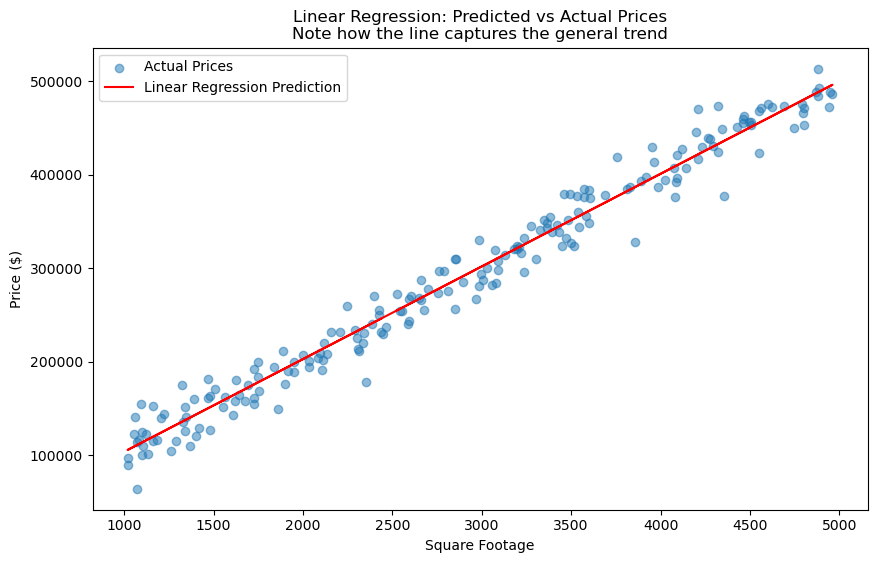

In [20]:
print(f"Linear Regression Results:")
print(f"MSE: {lr_mse:.2f} - This represents our average squared prediction error")
print(f"R² Score: {lr_r2:.3f} - This tells us what fraction of price variance our model explains")
print(f"Price per square foot: ${lr_model.coef_[0]:.2f} - This is our model's learned relationship")

# Visualize predictions against actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Prices')
plt.plot(X_test, lr_pred, color='red', label='Linear Regression Prediction')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('Linear Regression: Predicted vs Actual Prices\nNote how the line captures the general trend')
plt.legend()
plt.show()

Note that this picture is much less dense with respect to the number of data points since it's only 20% of the initial sample. They still seem to cover all possible input values pretty well (i.e., the entire x-axis) but we should always be on the lookout to make sure that our test set isn't restricted to a particular type of input.


## Step 5: Move to something a hair more complex

Data probably won't ever come in a single dimension. We're going to up the ante slowly and move towards neural networks (and then, convolutional networks).

As our start on this, let's move to make our housing model more complex.

Let's assume we go out and get more data for each of the houses in our data base. Instead of just having the square footage, we'll have 4 things:
- Square footage
- Number of bedrooms
- Number of bathrooms
- House age

It's going to be hard to draw a straight line through multiple dimensions (it would actually be a plane). In some sense, just like before, we're trying to find the least bad option - it's just that here, every choice is going to be much worse.


## Step 6: Generate more complex synthetic data

When we generate synthetic data, we can make the data by combining things in a linear way (like we did before) or in a non-linear way. The relationship we had before was:

$ price = 100 * sqFt $

(and then we added some noise)

This made the error small when we tried to force fit a line to it. Real data isn't normally so nice. This time when we generate the synthetic data we're going to add something non-linear. For example, newer houses tend to command higher prices, but this effect diminishes with age (exponential decay). This will help us demonstrate why we might need more complex models.

The equation that we're using inside of this function is:

$ price = 100 * sqFt + numBeds * 15000 + numBaths * 20000 + e^{-age / 10} * 50000 $

In [21]:
def generate_complex_house_data(n_samples=1000):
    """
    Creates synthetic house data with multiple features and non-linear relationships.

    The price is generated using a combination of:
    - Linear terms (e.g., base price per square foot)
    - Interaction effects (e.g., value of additional bathrooms varies with house size)
    - Non-linear terms (e.g., exponential decay of value with age)

    Returns:
        X: Array of features (sqft, bedrooms, bathrooms, age)
        price: Array of house prices
    """
    # Generate realistic feature distributions
    sqft = np.random.uniform(1000, 5000, n_samples)
    bedrooms = np.random.randint(1, 7, n_samples)  # 1-6 bedrooms
    bathrooms = np.random.uniform(1, 4, n_samples)  # 1-4 bathrooms
    age = np.random.uniform(0, 50, n_samples)  # 0-50 years old

    # Create price with non-linear relationships
    base_price = (
            sqft * 100 +  # Base price per sqft
            bedrooms * 15000 +  # Value per bedroom
            bathrooms * 20000 +  # Value per bathroom
            np.exp(-age / 10) * 50000  # Age effect (newer houses worth more)
    )

    # Add noise to represent unmeasured factors
    noise = np.random.normal(0, 25000, n_samples)
    price = base_price + noise

    # Combine features into array
    X = np.column_stack([sqft, bedrooms, bathrooms, age])

    return X, price

Now we're going to use that function to generate data and split it into a train and test set (again using the 80\%/20\% split and the seed of 42).

In [22]:
X_complex, y_complex = generate_complex_house_data()
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y_complex, test_size=0.2, random_state=42
)

## Step 7: Understanding Neural Networks as Extended Linear Models

Before we dive into neural networks, let's understand how they build upon linear
regression. A linear regression model can be thought of as the simplest possible
neural network - one with:
- No hidden layers
- A single output neuron
- A linear activation function

The equation for linear regression is:

$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$

This is exactly the same as a neural network with:
1. Input layer: Your features $(x_1, x_2, \ldots)$
2. Output layer: A single neuron
3. Weights: The coefficients $(w_1, w_2, \ldots)$
4. Bias: The intercept term $(b)$

The key difference with more complex neural networks is that they:
1. Add intermediate (hidden) layers
2. Use non-linear activation functions
3. Learn multiple intermediate representations of the data

This allows them to capture more complex patterns than simple linear combinations.

Fundamentally, we're always looking to draw the best function we can through the data. The amount of inputs doesn't really do anything except make the math a little more complicated and the coding a little more annoying - the ideas are the same.

First, let's scale our data - this is important for neural networks but wasn't as crucial for linear regression

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_complex)
X_test_scaled = scaler.transform(X_test_complex)

## Step 8: Linear Regression with Multiple Features
Before moving to neural networks, let's establish our baseline with
multiple linear regression. This model still assumes linear relationships,
but can now consider multiple features simultaneously.

Remember: This is mathematically equivalent to a neural network with:
- No hidden layers
- Linear activation function
- One output neuron

Pictorially, this looks like this:

![Linear Regression NN](<linear-regression-neuron.png>)

Writing $\hat{y}$ instead of $y$ on the right is common anytime we want to emphasize that we're looking at an *estimate*. In this picture, you can see the equation that we're going to end up with. Our model is restricted to creating the best equation it can of the form:

$ \hat{y} = b + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4$

To try and match:

$ price = 100 * sqFt + numBeds * 15000 + numBaths * 20000 + e^{-age / 10} * 50000 $

$ y = 100 * x_1 + 15000 * x_2 + 20000 * x_3 + e^{-x_4 / 10} * 50000 $

Which is (pretty clearly, hopefully) not going to work as well as it did before.

In [24]:
# Declares the model we want to be a LinearRegression() object
lr_complex = LinearRegression()

# Fits the data to the model as well as it can
lr_complex.fit(X_train_scaled, y_train_complex)

# Making predictions on the test set
lr_complex_pred = lr_complex.predict(X_test_scaled)

# Calculating error values
lr_complex_mse = mean_squared_error(y_test_complex, lr_complex_pred)
lr_complex_r2 = r2_score(y_test_complex, lr_complex_pred)

print("\nMultiple Feature Linear Regression Results:")
print(f"MSE: {lr_complex_mse:.2f}")
print(f"R² Score: {lr_complex_r2:.3f}")


Multiple Feature Linear Regression Results:
MSE: 635576321.62
R² Score: 0.957


## Step 9: Neural Network Without Hidden Layers

Now let's create a neural network that's equivalent to our linear regression. This helps demonstrate that neural networks are a generalization of linear models.

Key points to understand:
1. With no hidden layers and a linear activation, this neural network
   should perform almost identically to linear regression
2. Any small differences come from:
   - Different optimization algorithms
   - Different ways of initializing weights
   - Different convergence criteria

This step helps us see that neural networks aren't magic - they're built
on the same fundamental principles as linear regression.

In [25]:
simple_nn = MLPRegressor(
    hidden_layer_sizes=(),     # No hidden layers - same as linear regression
    activation='identity',     # Linear activation
    solver='adam',            # Adam optimizer often works better than default
    learning_rate_init=0.001, # Smaller learning rate for stability
    max_iter=2000,           # More iterations to ensure convergence
    tol=1e-8,               # Stricter convergence criteria
    batch_size='auto',      # Let it optimize batch size
    early_stopping=True,    # Enable early stopping
    validation_fraction=0.1, # Use some data for validation
    n_iter_no_change=50,    # Be patient with convergence
    random_state=42
)

Let's take a second here.

This is still our "build_model()" phase.

Before we had something like:

`ourObjectName = LinearRegressor()`

Now we have:

`ourObjectName = MLPRegressor()`

This time, we're specifying more of the inputs. This is more to explain some of the choices (and give you things to look into yourself) than because the values are actually any better thant he defaults.

In the code we're using in the project, they have something more like:

`objectName = Model()`

`MLPRegressor` is a *specific kind of model*. It's a "**M**ulti**l**ayer **P**erceptron Regressor". We can:

- Add as many hidden layers as we want
- Make every hidden layer as big as we want
- Change various parameters that control performance
- etc

But we can't change the fundamental fact that it's a Multilayer Perceptron Regressor. A lot of research teams want more control over the model they use so they'll create their own model "from scratch" (really, using well-defined building blocks) using functions like `Model` in Tensorflow.

Returning back to this particular model we just created, we can try to fit the best MLPRegressor with no hidden layers and no activation function to the data. We're still trying to fit a line to the much more random data.

In [26]:
simple_nn.fit(X_train_scaled, y_train_complex)
simple_nn_pred = simple_nn.predict(X_test_scaled)

/Users/evancoleman/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


And it doesn't work so well. C'est la vie. We can still get some output metrics.

In [27]:
simple_nn_mse = mean_squared_error(y_test_complex, simple_nn_pred)
simple_nn_r2 = r2_score(y_test_complex, simple_nn_pred)

print("Neural Network (No Hidden Layers) Results:")
print(f"MSE: {simple_nn_mse:.2f}")
print(f"R² Score: {simple_nn_r2:.3f}")

Neural Network (No Hidden Layers) Results:
MSE: 184466439202.90
R² Score: -11.519


## Step 10: Adding Hidden Layers

Now we'll add hidden layers to our neural network. This is where the magic begins! Hidden layers allow the network to:

1. Learn intermediate features: Each layer can learn increasingly abstract representations of the input data.

2. Capture non-linear patterns: By using non-linear activation functions (like ReLU), the network can model complex relationships that linear models cannot.

3. Discover feature interactions: Hidden layers can learn how different features work together to influence the price.

Think of it this way:
- First hidden layer might learn basic concepts like "luxury factor"
  (combination of size and bathrooms)
- Second hidden layer might learn higher-level concepts like
  "modern family home" or "upscale property"
- These learned concepts then feed into the final price prediction

The architecture we choose (number and size of layers) determines the model's capacity to learn these intermediate representations.

In [33]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Two hidden layers, one with 64 neurons and one with 32 neurons
    activation='relu',  # ReLU activation allows for non-linear patterns
    max_iter=10000,
    random_state=42
)

To try to get across what's happening, let's look at things pictorially.
![MLP Diagram](<mlp-nn.png>)

So what's happening is that the linear combination from above is happening 64 times in the first layer at each of the "neurons" in that layer. Once those values are combined at any particular neuron, they're transformed using a non-linear function. In this case, it's done using a "Rectified Linear Unit (ReLU)". This function looks like this:

![ReLU](<relu.png>)

There are a ton of built-in non-linear "activation" functions that we can use. For now, choosing which one might work in any given circumstance might feel a little random. That's fine. The goal is to build intuition over time on what values might be good for any of the arguments. 

In general, the art of selecting the right values for any of the arguments inside of any neural network is very difficult. It's commonly referred to as "hyperparameter optimization". The idea is that the parameter of a function is typically the data that comes in (which we'll have plenty of!) and the settings that change things inside of the neural network (number of hidden layers, number of neurons in each layer, activation function, optimization function, number of iterations, etc) is separate.

Let's see how this neural network behaves when we try to train it.

In [34]:
mlp.fit(X_train_scaled, y_train_complex)
mlp_pred = mlp.predict(X_test_scaled)

mlp_mse = mean_squared_error(y_test_complex, mlp_pred)
mlp_r2 = r2_score(y_test_complex, mlp_pred)

print("\nNeural Network (With Hidden Layers) Results:")
print(f"MSE: {mlp_mse:.2f}")
print(f"R² Score: {mlp_r2:.3f}")


Neural Network (With Hidden Layers) Results:
MSE: 635635005.39
R² Score: 0.957


This isn't great, but we could improve by playing with the hyperparameters and continuing to try to improve. We're going to pivot and try a different architecture altogether.

## Step 11: Even deeper

Let's create a deeper network architecture. This demonstrates how adding
more layers affects the model's capabilities and challenges.

Key architectural choices:
1. More layers (4 instead of 2): Allows for learning more abstract features
2. Different activation (tanh): Shows how activation functions affect learning
3. Gradually decreasing layer sizes: Creates a "funnel" of information

Think about this architecture like a data processing pipeline:
Layer 1 (128 neurons): Learns many low-level features
Layer 2 (64 neurons): Combines low-level features into medium-level concepts
Layer 3 (32 neurons): Forms high-level abstractions
Layer 4 (16 neurons): Makes final high-level decisions

Trade-offs of deeper networks:
+ Can learn more complex patterns
+ Better at finding subtle feature interactions
- Take longer to train
- More prone to overfitting
- Harder to interpret


In [38]:
deep_mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),
    activation='logistic', 
    learning_rate_init=0.01,
    max_iter=10000,
    random_state=42
)

deep_mlp.fit(X_train_scaled, y_train_complex)
deep_mlp_pred = deep_mlp.predict(X_test_scaled)

/Users/evancoleman/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



## Step 12: Comparing models (Visualization and Analysis)

Data visualization is crucial for understanding how our models behave. Rather than
just looking at summary statistics, visualizations help us see patterns, identify
problems, and build intuition about model performance.

We'll create several complementary visualizations, each revealing different
aspects of model behavior. Think of this like examining a house from different
angles - each view tells us something new about the structure.

Our first visualization compares predicted vs actual prices for all three models.
This is like watching each model "guess" house prices and seeing how close they get.

Key things to look for:
1. Points closer to the diagonal line represent better predictions
2. Systematic deviations from the line suggest bias
3. Spread of points shows prediction variance
4. Different behavior in different price ranges reveals model strengths/weaknesses

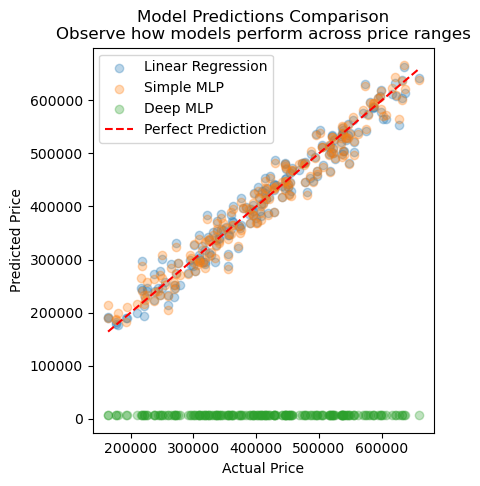

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_complex, lr_complex_pred, alpha=0.3, label='Linear Regression')
plt.scatter(y_test_complex, mlp_pred, alpha=0.3, label='Simple MLP')
plt.scatter(y_test_complex, deep_mlp_pred, alpha=0.3, label='Deep MLP')
plt.plot([y_test_complex.min(), y_test_complex.max()],
         [y_test_complex.min(), y_test_complex.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model Predictions Comparison\nObserve how models perform across price ranges')
plt.legend()


### Error Distribution Analysis

The error distribution tells us about the nature of our models' mistakes.
This is like analyzing the size and frequency of prediction errors.

A good error distribution should be:
1. Centered at zero (unbiased predictions)
2. Symmetric (equal chance of over/under-predicting)
3. Narrow (most predictions close to true values)

Different shapes tell us different things:
- Wide distribution → High variance in predictions
- Skewed distribution → Systematic bias
- Multiple peaks → Model might be behaving differently for different types of houses

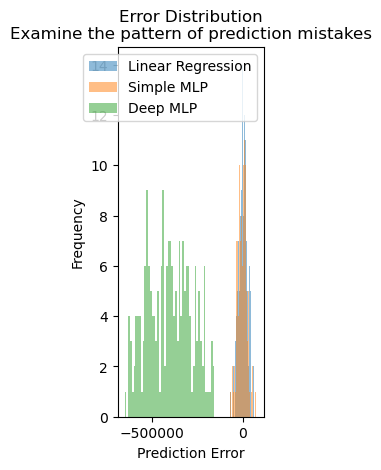

In [40]:
plt.subplot(1, 3, 2)
plt.hist(lr_complex_pred - y_test_complex, bins=50, alpha=0.5,
         label='Linear Regression')
plt.hist(mlp_pred - y_test_complex, bins=50, alpha=0.5,
         label='Simple MLP')
plt.hist(deep_mlp_pred - y_test_complex, bins=50, alpha=0.5,
         label='Deep MLP')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution\nExamine the pattern of prediction mistakes')
plt.legend()

### Price Range Performance Analysis

This visualization shows how each model performs across different price ranges.
It's particularly important because real estate markets often behave differently
for different price segments.

Think of this like analyzing how well each model handles:
- Entry-level homes
- Mid-market properties
- Luxury real estate

The x-axis divides houses into 10 price brackets (deciles), from cheapest to most
expensive. The y-axis shows average prediction error for each bracket.

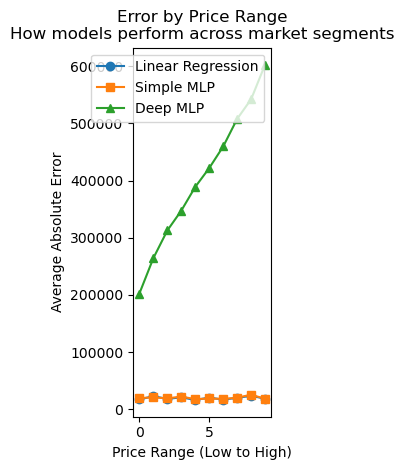

In [41]:
plt.subplot(1, 3, 3)
# Calculate average error by price range
price_ranges = pd.qcut(y_test_complex, q=10)
lr_errors = abs(lr_complex_pred - y_test_complex)
mlp_errors = abs(mlp_pred - y_test_complex)
deep_mlp_errors = abs(deep_mlp_pred - y_test_complex)

lr_mean_errors = pd.DataFrame({'price_range': price_ranges, 'error': lr_errors}).groupby('price_range').mean()
mlp_mean_errors = pd.DataFrame({'price_range': price_ranges, 'error': mlp_errors}).groupby('price_range').mean()
deep_mlp_mean_errors = pd.DataFrame({'price_range': price_ranges, 'error': deep_mlp_errors}).groupby(
    'price_range').mean()

plt.plot(range(10), lr_mean_errors['error'], marker='o', label='Linear Regression')
plt.plot(range(10), mlp_mean_errors['error'], marker='s', label='Simple MLP')
plt.plot(range(10), deep_mlp_mean_errors['error'], marker='^', label='Deep MLP')
plt.xlabel('Price Range (Low to High)')
plt.ylabel('Average Absolute Error')
plt.title('Error by Price Range\nHow models perform across market segments')
plt.legend()

plt.tight_layout()
plt.show()

### Learning Dynamics: Understanding How Models Learn

Learning curves show us how models improve with more training data. This helps us
understand:

1. Whether we have enough data
2. If our models are overfitting
3. The relative learning speeds of different architectures

Think of learning curves like watching students learn:
- Initial performance shows natural aptitude
- Rate of improvement shows learning efficiency
- Gap between training and test performance shows generalization

In [42]:
from sklearn.model_selection import learning_curve


def plot_learning_curves(estimators, X, y, title, cv=5):
    """
    Creates learning curves for multiple models to compare their learning dynamics.

    The curves show both training and test performance as the amount of training
    data increases. This helps us understand:
    - How quickly each model learns
    - Whether more data would help
    - If models are overfitting
    """
    plt.figure(figsize=(12, 4))

    for name, estimator in estimators.items():
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='neg_mean_squared_error'
        )

        train_scores_mean = -train_scores.mean(axis=1)
        test_scores_mean = -test_scores.mean(axis=1)

        plt.plot(train_sizes, train_scores_mean, label=f'{name} (train)')
        plt.plot(train_sizes, test_scores_mean, label=f'{name} (test)',
                 linestyle='--')

    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

### Analyzing performance on extreme cases

Real estate models often struggle with unusual properties. Let's specifically
examine how each model handles high-value properties (top 10% by price).

This analysis is crucial because:
1. Luxury properties often have unique features
2. Mistakes on expensive properties are more costly
3. Non-linear relationships might be more important in this segment

In [44]:
percentile_90 = np.percentile(y_test_complex, 90)
high_price_mask = y_test_complex >= percentile_90

high_price_errors = {
    'Linear Regression': mean_squared_error(
        y_test_complex[high_price_mask],
        lr_complex_pred[high_price_mask]
    ),
    'Simple MLP': mean_squared_error(
        y_test_complex[high_price_mask],
        mlp_pred[high_price_mask]
    ),
    'Deep MLP': mean_squared_error(
        y_test_complex[high_price_mask],
        deep_mlp_pred[high_price_mask]
    )
}

print("\nPerformance on Luxury Properties (Top 10%):")
for model, error in high_price_errors.items():
    print(f"{model:<20} ${error:,.2f}")


Performance on Luxury Properties (Top 10%):
Linear Regression    $636,132,817.02
Simple MLP           $527,417,402.90
Deep MLP             $364,342,912,332.75


## Key Takeaways and Practical Implications
Our journey from linear regression to deep neural networks reveals several important insights:

1. Model Complexity Trade-offs:
   - Simpler models (linear regression) are more interpretable
   - Complex models can capture non-linear patterns but require more data
   - More complex isn't always better - it depends on the data

2. Feature Interactions:
   - Neural networks automatically learn feature interactions
   - Deeper networks can learn more complex interactions
   - But this comes at the cost of interpretability

3. Market Segment Performance:
   - Different models excel in different price ranges
   - Consider using different models for different market segments
   - Hybrid approaches might be worth exploring

4. Practical Considerations:
   - Start simple and add complexity only as needed
   - Monitor both average performance and extreme cases
   - Consider computational costs and maintenance requirements
